In [1]:
import numpy as np
import pandas as pd

# pharmacoDB

## Drug info harmaonization

In [ ]:
# It did not work
# I downloaded the drug info and cell-line info from the website

In [ ]:
# This works for the original first dictionary

In [72]:
import pandas as pd
import os
import pickle

def update_drug_info(drug_dict, drug_names, smiles=None):
    # Use the list of drug names directly as the key
    key_tuple = tuple(drug_names)  # Convert list to a tuple to use as a dictionary key
    if key_tuple not in drug_dict:
        drug_dict[key_tuple] = smiles

file_dir = '/home/vmottaqi/kg/drug_metadata'
files = [os.path.join(file_dir, f) for f in os.listdir(file_dir) if '_drug_info.csv' in f]

drug_dict = {}

for file_path in files:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    obj_name = os.path.basename(file_path).replace('_drug_info.csv', '')
    name_cols = []
    smiles_col = 'smiles'  # This might not exist in all files

    # Define column configurations for each dataset
    if obj_name == "CCLE":
        name_cols = ['Compound..code.or.generic.name.', 'Compound..brand.name.', 'Compound', 'treatmentid', 'drug.name']
    elif obj_name == "Tavor":
        name_cols = ['Compound.Name', 'treatmentid']
    elif obj_name == "UHNBreast":
        name_cols = ['treatmentid']
    elif obj_name == "PDTX":
        name_cols = ['DRUG_NAME', 'BRAND_NAME', 'unique.treatmentid']
    elif obj_name == "GRAY":
        name_cols = ['treatmentid']
    elif obj_name == "gCSI":
        name_cols = ['treatmentid']
    elif obj_name == "BeatAML":
        name_cols = ['drug.name']
    elif obj_name == "CTRPv2":
        name_cols = ['Master_cpd_id', 'cpd_name', 'broad_cpd_id', 'treatmentid']
    elif obj_name == "FIMM":
        name_cols = ['Drug.name', 'treatmentid']
    elif obj_name == "GBM2":
        name_cols = ['GBM.treatmentid', 'treatmentid', 'Compound.name']
    elif obj_name == "GBM3":
        name_cols = ['GBM.treatmentid', 'treatmentid', 'Compound.name']
    elif obj_name == "GDSCv2":
        name_cols = ['DRUG_NAME', 'SYNONYMS', 'treatmentid']
    elif obj_name == "GDSCv1":
        name_cols = ['DRUG_NAME', 'SYNONYMS', 'treatmentid']
    elif obj_name == "NCI60":
        name_cols = ['treatmentid', 'NCI60.treatmentid']
    elif obj_name == "PRISM":
        name_cols = ['PRISM.treatmentid', 'broad_id', 'treatmentid']
    
    else:
        print(f"No configuration for {obj_name}, skipping...")
        continue

    for index, row in df.iterrows():
        # Collect all drug names from the specified columns for the current dataset
        drug_names = [str(row[col]) for col in name_cols if col in df.columns and pd.notna(row[col])]
        # Get SMILES string if available
        smiles = str(row[smiles_col]) if smiles_col in df.columns and pd.notna(row[smiles_col]) else None
        # Update dictionary with drug names and SMILES
        update_drug_info(drug_dict, drug_names, smiles)

# Serialize the drug dictionary
with open('/home/vmottaqi/kg/drug_metadata/drug_dictionary.pkl', 'wb') as f:
    pickle.dump(drug_dict, f)

print("Drug dictionary has been saved.")


Drug dictionary has been saved.


In [56]:
CCLE = pd.read_csv('/home/vmottaqi/kg/drug_metadata/GBM2_drug_info.csv', encoding='ISO-8859-1')

CCLE

,GBM.treatmentid,treatmentid,Compound.name,Vendor/provider,Chemical.Abstracts.Service.(CAS).code,Molecular.Formula,Molecular.Weight.(g/M),SMILES,InChIKey1,PubCHEM.excerpt,...,Phase.3.compound,IC50.of.average.dose.response.curve.within.dose.range,IC75.of.average.dose.response.curve.within.dose.range,IC50.of.most.responsive.cell.line.within.dose.range,IC75.of.most.responsive.cell.line.within.dose.range,Mean.AUC,Fraction.of.cultures.with.at.least.30%.viability.reduction,Top.30.most.active.and.PubMed.novel,Drug.cluster,Best.CV-R
0,"2-Hydroxy-5-(2,5-dihydroxybenzylamino)benzoic ...","5-[(2,5-Dihydroxybenzyl)amino]-2-hydroxybenzoi...","2-hydroxy-5-(2,5-dihydroxybenzylamino)benzoic ...",SMS,125697-93-0,NaN,NaN,C1=CC(=C(C=C1NCC2=C(C=CC(=C2)O)O)C(=O)O)O,NaN,Potent inhibitor of protein tyrosine kinases. ...,...,0.0,0.0,0.0,0.0,0.0,1.10,0.00,0.0,3.0,0.307753
1,"5,6-dichloro-1-?-D-ribofuranosylbenzimidazole",DRB,"5,6-dichloro-1-?-d-ribofuranosylbenzimidazole",SMS,53-85-0,NaN,NaN,C1=C2C(=CC(=C1Cl)Cl)N(C=N2)C3C(C(C(O3)CO)O)O,NaN,53-85-0 is an RNA polymerase II transcriptiona...,...,0.0,0.0,1.0,0.0,1.0,1.05,0.00,0.0,3.0,0.431379
2,5-Nonyloxytryptamine oxalate,5-nonyloxytryptamine oxalate,5-nonyloxytryptamine,SMS,157798-12-4,NaN,NaN,CCCCCCCCCOC1=CC2=C(C=C1)NC=C2CCN.C(=O)(C(=O)O)O,NaN,Nonyloxytryptamine (5-nonyloxytryptamine) is a...,...,1.0,1.0,1.0,1.0,1.0,0.72,0.32,0.0,16.0,0.383809
3,6-azauridine,6-Azauridine,6-azauridine,SMS,54-25-1,NaN,NaN,C1=NN(C(=O)NC1=O)C2C(C(C(O2)CO)O)O,NaN,6-Azauridine is a synthetic triazine analogue ...,...,0.0,0.0,1.0,0.0,1.0,0.90,0.02,0.0,20.0,0.350530
4,Acetaminophen,Acetaminophen,acetaminophen,Prestw-868,103-90-2,C8H9NO2,151.16643,C(Nc1ccc(cc1)O)(=O)C,RZVAJINKPMORJF-UHFFFAOYSA-N,Acetaminophen is a p-aminophenol derivative wi...,...,0.0,0.0,0.0,0.0,0.0,1.06,0.00,0.0,NaN,0.209210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Vinorelbine tartrate,Vinorelbine,vinorelbine tartrate,SMS,125317-39-7,NaN,NaN,CCC1=CC2CC(C3=C(CN(C2)C1)C4=CC=CC=C4N3)(C5=C(C...,GBABOYUKABKIAF-IELIFDKJSA-N,Vinorelbine is a semisynthetic vinca alkaloid....,...,1.0,1.0,1.0,1.0,1.0,0.63,0.53,0.0,17.0,0.307345
252,withaferin,Withaferin A,withaferin,ACT,5119-48-2,NaN,NaN,CC1=C(C(=O)OC(C1)C(C)C2CCC3C2(CCC4C3CC5C6(C4(C...,NaN,Steroidal lactone that exhibits cytotoxicity t...,...,1.0,1.0,1.0,1.0,1.0,0.48,0.95,0.0,5.0,0.463937
253,Ziprasidone Hydrochloride,Ziprasidone Hydrochloride Monohydrate,ziprasidone hydrochloride,Prestw-1188,138982-67-9,C21H22Cl2N4OS,449.40569,c1(nsc2c1cccc2)N1CCN(CCc2c(cc3NC(Cc3c2)=O)Cl)CC1,MVWVFYHBGMAFLY-UHFFFAOYSA-N,Ziprasidone is a benzothiazolylpiperazine deri...,...,1.0,1.0,1.0,1.0,1.0,0.89,0.05,0.0,4.0,0.133734
254,Zonisamide,Zonisamide,zonisamide,Prestw-1162,68291-97-4,C8H8N2O3S,212.22856,S(Cc1noc2c1cccc2)(=O)(=O)N,UBQNRHZMVUUOMG-UHFFFAOYSA-N,Zonisamide is an Anti-epileptic Agent. The mec...,...,0.0,0.0,0.0,0.0,0.0,0.99,0.00,0.0,1.0,-0.039745


In [58]:
for value in CCLE['GBM.treatmentid']:
    print(value)

2-Hydroxy-5-(2,5-dihydroxybenzylamino)benzoic acid
5,6-dichloro-1-?-D-ribofuranosylbenzimidazole
5-Nonyloxytryptamine oxalate
6-azauridine
Acetaminophen
AG-126
AG-494
Albendazole
Alfacalcidol
Altretamine
AMA404
Aminocaproic acid
Amiodarone hydrochloride
Amlodipine
Amodiaquin dihydrochloride dihydrate
Anisomycin
Antibiotic A-23187
Adiphenine HCl
Articaine hydrochloride
Astemizole
Atorvastatin
Axitinib
Azacytidine-5
Azaguanine-8
Azelastine HCl
Azithromycin
Balsalazide Sodium
Cabazitaxel  
Benserazide hydrochloride
Bepridil hydrochloride 
Bortezomib  
Bretylium tosylate
Bromocryptine mesylate
Bucladesine sodium salt
Buspirone hydrochloride
Cefazolin sodium salt
cerivastatin
CGS 12066B dimaleate
Dichlorbenzamil
Chlorhexidine
Chlorpromazine hydrochloride
Chlorprothixene hydrochloride
Ciclopirox ethanolamine
cilengitide
Cilnidipine
Clemastine fumarate
Clofarabine  
Clofilium tosylate
Clomiphene citrate (Z.E) 
Clomipramine hydrochloride
Colchicine
Cortisol acetate
Crizotinib  
Dicumarol
Cyclo

In [68]:
import pandas as pd
df = pd.read_csv('/home/vmottaqi/kg/AUC_data/PRISM_auc_recomputed.csv', encoding='ISO-8859-1', index_col=0)

for i in df.index:
    print(i)

1-Azakenpaullone
1-naphthyl-PP1
1-Phenylbiguanide
10-Deacetylbaccatin III
10-Hydroxycamptothecin
Phorbol 12-myristate 13-acetate
2-Methoxyestradiol
3-(2,3-Dichlorophenoxy)propyl-(2-hydroxyethyl)azanium
2'-MeCCPA
3-aminobenzamide
3-Deazaneplanocin
3'-fluorobenzylspiperone
4-(4-fluorobenzoyl)-1-(4-phenylbutyl)-piperidine
1-(4-Chlorophenyl)guanidine
4-hydroxyphenazone
4-IPP
Biochanin A
4-Methylhistamine
Pyrimidine-4-carbonitrile
4E1RCat
5-Fluorouracil
Desfesoterodine
7-aminocephalosporanic acid
7-Hydroxystaurosporine
7-nitroindazole
8-Bromo-cGMP
8-Hydroxy-pipat
9-Aminoacridine
A-674563
A-803467
A61603
Abemaciclib
Abiraterone
Abt-702
Abt-737
Abt-751
AC-264613
Acdpp
acesulfame-potassium
Acetazolamide
Acetophenazine
Acetylcysteine
Acetylsalicylsalicylic acid
Acipimox
Acivicin
ACY-1215
Adapalene
alpha-D-Glucose-6-phosphate
Adarotene
Adefovir dipivoxil
ADL5859
AEE788
AEG3482
Afatinib
Fabomotizole
AG14361
Ajmaline
Albendazole
Alectinib
Alexidine
Alfacalcidol
Alisertib
Almorexant
Alogliptin
Alpe

In [8]:
import pandas as pd
PRISM = pd.read_csv('/home/vmottaqi/kg/AUC_data/PRISM_auc_recomputed.csv', encoding='ISO-8859-1')


In [16]:
for value in PRISM['Unnamed: 0']:
    print(value)

1-Azakenpaullone
1-naphthyl-PP1
1-Phenylbiguanide
10-Deacetylbaccatin III
10-Hydroxycamptothecin
Phorbol 12-myristate 13-acetate
2-Methoxyestradiol
3-(2,3-Dichlorophenoxy)propyl-(2-hydroxyethyl)azanium
2'-MeCCPA
3-aminobenzamide
3-Deazaneplanocin
3'-fluorobenzylspiperone
4-(4-fluorobenzoyl)-1-(4-phenylbutyl)-piperidine
1-(4-Chlorophenyl)guanidine
4-hydroxyphenazone
4-IPP
Biochanin A
4-Methylhistamine
Pyrimidine-4-carbonitrile
4E1RCat
5-Fluorouracil
Desfesoterodine
7-aminocephalosporanic acid
7-Hydroxystaurosporine
7-nitroindazole
8-Bromo-cGMP
8-Hydroxy-pipat
9-Aminoacridine
A-674563
A-803467
A61603
Abemaciclib
Abiraterone
Abt-702
Abt-737
Abt-751
AC-264613
Acdpp
acesulfame-potassium
Acetazolamide
Acetophenazine
Acetylcysteine
Acetylsalicylsalicylic acid
Acipimox
Acivicin
ACY-1215
Adapalene
alpha-D-Glucose-6-phosphate
Adarotene
Adefovir dipivoxil
ADL5859
AEE788
AEG3482
Afatinib
Fabomotizole
AG14361
Ajmaline
Albendazole
Alectinib
Alexidine
Alfacalcidol
Alisertib
Almorexant
Alogliptin
Alpe

In [14]:
# Find rows where any column matches the value 'brd-k14329163-001-03-9'
matching_rows = PRISM[PRISM.apply(lambda row: row.astype(str).str.contains('Zolmitriptan').any(), axis=1)]

# Print the matching rows
print(matching_rows)

        Unnamed: 0  22Rv1  23132/87  253J  253J-BV  42-MG-BA     5637  \
1435  Zolmitriptan    1.0  0.907683   NaN  0.88527       1.0  0.97281   

          639V      647V     769-P  ...      WM88    WM983B      YAPC  YD-10B  \
1435  0.955686  0.886492  0.925723  ...  0.963233  0.927643  0.984473     NaN   

       YD-15     YD-38      YD-8     YH-13     YKG-1   ZR-75-1  
1435  0.9176  0.877689  0.897959  0.991147  0.866353  0.891876  

[1 rows x 481 columns]


In [1]:
import pickle

# Specify the path to your .pkl file
pkl_file_path = '/home/vmottaqi/gene_uniprotID_mapping_v2.pkl'

# Open the file in read-binary mode
with open(pkl_file_path, 'rb') as file:
    # Load the dictionary from the pickle file
    drug_dictionary1 = pickle.load(file)

In [2]:
drug_dictionary1

{'Q96IC2': [['44M2.3', 'REXO5'],
  'RNA exonuclease 5 (EC 3.1.-.-) (Exonuclease NEF-sp)'],
 'Q9NQ94': [['A1CF', 'ACF', 'ASP'],
  'APOBEC1 complementation factor (APOBEC1-stimulating protein)'],
 'P01023': [['A2M', 'FWP007', 'CPAMD5'],
  'Alpha-2-macroglobulin (Alpha-2-M) (C3 and PZP-like alpha-2-macroglobulin domain-containing protein 5)'],
 'A8K2U0': [['CPAMD9', 'A2ML1'],
  'Alpha-2-macroglobulin-like protein 1 (C3 and PZP-like alpha-2-macroglobulin domain-containing protein 9)'],
 'Q9NRG9': [['AAAS', 'ADRACALA', 'GL003'], 'Aladin (Adracalin)'],
 'Q86V21': [['ACSF1', 'AACS'],
  'Acetoacetyl-CoA synthetase (EC 6.2.1.16) (Acyl-CoA synthetase family member 1) (Protein sur-5 homolog)'],
 'Q6P093': [['AADACL2'], 'Arylacetamide deacetylase-like 2 (EC 3.1.1.-)'],
 'Q8N5Z0': [['AADAT', 'KYAT2', 'KAT2'],
  'Kynurenine/alpha-aminoadipate aminotransferase, mitochondrial (KAT/AadAT) (2-aminoadipate aminotransferase) (2-aminoadipate transaminase) (EC 2.6.1.39) (Alpha-aminoadipate aminotransferase)

In [97]:
len(drug_dictionary1.keys())

57861

In [ ]:
# cleaning the dictionary v2

In [99]:
import pandas as pd
import pickle

# Load the dictionary
with open('/home/vmottaqi/kg/drug_metadata/drug_dictionary.pkl', 'rb') as f:
    drug_dict = pickle.load(f)

# Process each key in the dictionary
new_drug_dict = {}
for key, smiles in drug_dict.items():
    new_key = set()  # Initialize a new set for the updated keys
    for name in key:
        # Convert to lowercase
        name = name.lower()
        new_key.add(name)  # Add the original name
        if '///' in name:
            parts = name.split('///')
            new_key.update(parts)  # Add each part as a separate entry
    
    # Convert the updated set back to a tuple and assign the smiles
    new_key = tuple(sorted(new_key))
    new_drug_dict[new_key] = smiles  # Update the dictionary with the processed keys

# Serialize the updated drug dictionary
with open('/home/vmottaqi/kg/drug_metadata/drug_dictionary_v2.pkl', 'wb') as f:
    pickle.dump(new_drug_dict, f)

print("Updated drug dictionary has been saved.")


Updated drug dictionary has been saved.


In [100]:
import pickle

# Specify the path to your .pkl file
pkl_file_path = '/home/vmottaqi/kg/drug_metadata/drug_dictionary_v2.pkl'

# Open the file in read-binary mode
with open(pkl_file_path, 'rb') as file:
    # Load the dictionary from the pickle file
    drug_dictionary = pickle.load(file)

In [102]:
len(drug_dictionary.keys())

57696

In [103]:
drug_dictionary

{('681640',): None,
 ('(5z)-7-oxozeaenol',): None,
 ('17-aag', 'tanespimycin', 'telatinib'): None,
 ('5-fluorouracil',): 'C1=C(C(=O)NC(=O)N1)F',
 ('abt-263', 'navitoclax'): None,
 ('ag-014699', 'rucaparib phosphate'): None,
 ('acadesine', 'aicar'): None,
 ('akt inhibitor viii',): None,
 ('amg-706', 'motesanib', 'motesanib diphosphate'): None,
 ('anastrozole',): None,
 ('axitinib',): None,
 ('az-628', 'az628'): None,
 ('az960',): None,
 ('azd2281', 'olaparib'): None,
 ('azd6482',): None,
 ('azd7762',): 'C1CC(CNC1)NC(=O)C2=C(C=C(S2)C3=CC(=CC=C3)F)NC(=O)N',
 ('azd8055', 'pp242'): None,
 ('azd8931', 'sapitinib'): None,
 ('bi-2536', 'npk33-1-98-1'): None,
 ('bi-d1870', 'bid1870'): None,
 ('afatinib', 'bibw2992'): None,
 ('bicalutamide', 'casodex'): None,
 ('birb 0796', 'doramapimod'): None,
 ('bmn-673', 'talazoparib'): None,
 ('bms-345541', 'bms-345541 free base'): None,
 ('bms-536924',): None,
 ('avagacestat', 'bms-708163'): None,
 ('bms-754807',): 'CC1(CCCN1C2=NN3C=CC=C3C(=N2)NC4=NNC(=C4)

In [2]:
import pickle

# Load the dictionary
with open('/home/vmottaqi/kg/drug_metadata/drug_dictionary_v2.pkl', 'rb') as f:
    drug_dict = pickle.load(f)

def find_merge_key(key, key_to_group):
    """ Helper function to find if a key should be merged with an existing group based on overlapping drug names. """
    for existing_key, group_key in key_to_group.items():
        if set(key) & set(existing_key):  # If there is an intersection
            return group_key
    return None

# This dictionary will map every key to its "group" key where it should be merged
key_to_group = {}
merged_drug_dict = {}

for key, smiles in drug_dict.items():
    if smiles is None:
        smiles = []
    elif not isinstance(smiles, list):
        smiles = [smiles]

    merge_key = find_merge_key(key, key_to_group)
    if merge_key:
        # Merge current key's items into the found merge key's items
        merged_drug_dict[merge_key].update(smiles)
        # Update the key mapping to reflect that this key also belongs to the merge group
        key_to_group[key] = merge_key
    else:
        # If no merge key is found, this key becomes a new group by itself
        merged_drug_dict[key] = set(smiles)
        key_to_group[key] = key

# Convert sets to lists for serialization and clean up dictionary keys
final_drug_dict = {tuple(sorted(key)): list(smiles) for key, smiles in merged_drug_dict.items()}

# Serialize the merged drug dictionary
with open('/home/vmottaqi/kg/drug_metadata/drug_dictionary_v3.pkl', 'wb') as f:
    pickle.dump(final_drug_dict, f)

print("Merged drug dictionary has been saved.")


KeyboardInterrupt: 

In [2]:
import pickle

# Specify the path to your .pkl file
pkl_file_path = '/home/vmottaqi/kg/drug_metadata/drug_dictionary_v3.pkl'

# Open the file in read-binary mode
with open(pkl_file_path, 'rb') as file:
    # Load the dictionary from the pickle file
    drug_dictionary3 = pickle.load(file)

In [4]:
len(drug_dictionary3.keys())

56299

In [5]:
drug_dictionary3

{('681640',): [],
 ('(5z)-7-oxozeaenol',): [],
 ('17-aag',
  'tanespimycin',
  'telatinib'): ['CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C1)C2=O)NCC=C)C)OC)OC(=O)N)C)C)O)OC', 'CO[C@H]1C[C@H](C)CC2=C(NCC=C)C(=O)C=C(NC(=O)\\C(C)=C\\C=C/[C@H](OC)[C@@H](OC(N)=O)\\C(C)=C\\[C@H](C)[C@H]1O)C2=O, CO[C@H]1C[C@H](C)CC2=C(NCC=C)C(=O)C=C(NC(=O)\\C(C)=C\\C=C/[C@H](OC)[C@@H](OC(N)=O)\\C(C)=C\\[C@H](C)[C@H]1O)C2=O', 'CNC(=O)C1=NC=CC(=C1)COC2=NN=C(C3=C2OC=C3)NC4=CC=C(C=C4)Cl', 'CNC(=O)c1cc(COc2nnc(Nc3ccc(Cl)cc3)c3ccoc23)ccn1'],
 ('5-fluorouracil',): ['C1=C(C(=O)NC(=O)N1)F',
  'Fc1c[nH]c(=O)[nH]c1=O, Fc1c[nH]c(=O)[nH]c1=O'],
 ('abt-263',
  'navitoclax'): ['CC1(C)CCC(=C(CN2CCN(CC2)c2ccc(cc2)C(=O)NS(=O)(=O)c2ccc(N[C@H](CCN3CCOCC3)CSc3ccccc3)c(c2)S(=O)(=O)C(F)(F)F)C1)c1ccc(Cl)cc1, CC1(C)CCC(=C(CN2CCN(CC2)c2ccc(cc2)C(=O)NS(=O)(=O)c2ccc(N[C@H](CCN3CCOCC3)CSc3ccccc3)c(c2)S(=O)(=O)C(F)(F)F)C1)c1ccc(Cl)cc1', 'CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(=O)(=O)C4=CC(=C(C=C4)NC(CCN5CCOCC5)CSC6=CC=CC=C6)S(=O

## Normalizing AUC data

In [ ]:
# they have been obtained already with the R code

In [ ]:
# need for normalization:
# BeatAML_auc_recomputed.csv
# GBM2_auc_recomputed.csv
# GBM3_auc_recomputed.csv
# Tavor_auc_recomputed.csv

In [39]:
df1 = pd.read_csv("/home/vmottaqi/kg/AUC_data/BeatAML_auc_recomputed.csv", index_col=0)
df1

,A_11-00261,A_12-00023,A_12-00051,A_12-00066,A_12-00069,A_12-00127,A_12-00150,A_12-00211,A_12-00258,A_12-00294,...,A_16-00526,A_16-00817,A_16-00869,A_13-00159,A_16-00575,A_16-00797,A_16-01011,A_16-01126,A_17-00216,A_16-00577
Tanespimycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.231442,-41.926595,-62.641802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-674563,NaN,-25.349690,-33.889399,-48.509383,-40.834630,-35.186671,-55.183752,-25.392602,-24.103906,-47.244838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abt-737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.515218,-38.261786,-7.293571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afatinib,NaN,-15.833390,-23.788555,-55.987105,-26.801369,-29.357736,-55.896245,-6.531810,-28.966282,-42.251797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alisertib,-18.515830,1.000000,-33.219630,-31.128684,-3.118745,-19.937913,-14.087357,-16.830989,-2.969482,-27.824217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vismodegib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.098312,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volasertib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neflamapimod,-27.034989,-8.400893,-26.659487,-62.628072,-13.133749,-16.451059,-18.481849,-10.841121,-27.296357,-47.140563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XAV-939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.509752,-1.516353,-22.605648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df = 1 - df1
df

,A_11-00261,A_12-00023,A_12-00051,A_12-00066,A_12-00069,A_12-00127,A_12-00150,A_12-00211,A_12-00258,A_12-00294,...,A_16-00526,A_16-00817,A_16-00869,A_13-00159,A_16-00575,A_16-00797,A_16-01011,A_16-01126,A_17-00216,A_16-00577
Tanespimycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.231442,42.926595,63.641802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-674563,NaN,26.349690,34.889399,49.509383,41.834630,36.186671,56.183752,26.392602,25.103906,48.244838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abt-737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.515218,39.261786,8.293571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afatinib,NaN,16.833390,24.788555,56.987105,27.801369,30.357736,56.896245,7.531810,29.966282,43.251797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alisertib,19.515830,0.000000,34.219630,32.128684,4.118745,20.937913,15.087357,17.830989,3.969482,28.824217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vismodegib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.098312,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volasertib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neflamapimod,28.034989,9.400893,27.659487,63.628072,14.133749,17.451059,19.481849,11.841121,28.296357,48.140563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XAV-939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.509752,2.516353,23.605648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Histograms of first 4 drugs

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for the first 4 rows (drugs)
for i in range(4):
    axes[i].hist(df.iloc[i, :], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of Data for {df.index[i]}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure with high DPI
# plt.savefig('drug_distributions.png', dpi=900)

# Show the plot
plt.show()

In [ ]:
# histogram of all the values

In [ ]:
# Flatten all values in the DataFrame into a single array
all_values = df.values.flatten()

# Plot histogram of all values
plt.figure(figsize=(8, 6))
plt.hist(all_values, bins=50, edgecolor='black')
plt.title('Distribution of All Values in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Normalization
# division by 100


In [41]:
# Step 1: Convert AAC values to a range between 0 and 1 by dividing by 100
df_normalized = df / 100

# Step 2: Convert AAC to AUC by doing 1 - value
df_auc = 1 - df_normalized

# Save the AUC dataframe to a new CSV file
df_auc.to_csv('/home/vmottaqi/kg/AUC_data/BeatAML_auc_recomputed_1.csv', index=True)

In [42]:
df_auc

,A_11-00261,A_12-00023,A_12-00051,A_12-00066,A_12-00069,A_12-00127,A_12-00150,A_12-00211,A_12-00258,A_12-00294,...,A_16-00526,A_16-00817,A_16-00869,A_13-00159,A_16-00575,A_16-00797,A_16-01011,A_16-01126,A_17-00216,A_16-00577
Tanespimycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817686,0.570734,0.363582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-674563,NaN,0.736503,0.651106,0.504906,0.581654,0.638133,0.438162,0.736074,0.748961,0.517552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abt-737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974848,0.607382,0.917064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afatinib,NaN,0.831666,0.752114,0.430129,0.721986,0.696423,0.431038,0.924682,0.700337,0.567482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alisertib,0.804842,1.000000,0.657804,0.678713,0.958813,0.790621,0.849126,0.821690,0.960305,0.711758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vismodegib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.949017,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volasertib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neflamapimod,0.719650,0.905991,0.723405,0.363719,0.858663,0.825489,0.805182,0.881589,0.717036,0.518594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XAV-939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.804902,0.974836,0.763944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Detection of hub genes in adjacency matrix

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the adjacency matrix from a CSV file
# Replace 'your_adjacency_matrix.csv' with your file path
adjacency_matrix = pd.read_csv('~/rnaseq_synapse/filtered_adj_matrices/adj_mat_1_2_filt.csv', index_col=0)
adjacency_matrix

,POSTN,RTP1,PTGER3,SERPINA5,FREM3,TESPA1,NGB,PCP4,RGS4,HTR1A,...,RORA,EPG5,TP53INP1,TET2,CCDC6,TMEM170B,CASP8,UNC5C,SPPL2A,ENAH
POSTN,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RTP1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PTGER3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SERPINA5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FREM3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMEM170B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
CASP8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
UNC5C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
SPPL2A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [5]:
# Step 2: Convert the adjacency matrix into a NetworkX graph
# Assuming the adjacency matrix is symmetric and unweighted
G = nx.from_pandas_adjacency(adjacency_matrix)
G

In [24]:
# Step 3: Calculate various centrality measures
# 3.1 Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 3.2 Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 3.3 Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 3.4 Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# 3.5 PageRank
pagerank = nx.pagerank(G)

# 3.6 Clustering Coefficient
clustering_coefficient = nx.clustering(G)


In [25]:
# Step 4: Combine centrality measures into a single DataFrame
metrics_df = pd.DataFrame({
    'degree': degree_centrality,
    'betweenness': betweenness_centrality,
    'closeness': closeness_centrality,
    'eigenvector': eigenvector_centrality,
    'pagerank': pagerank,
    'clustering_coefficient': clustering_coefficient
})
metrics_df

,degree,betweenness,closeness,eigenvector,pagerank,clustering_coefficient
POSTN,0.012232,0.001508,0.235595,0.000463,0.000983,0.133333
RTP1,0.033639,0.005710,0.273227,0.083723,0.001693,0.505263
PTGER3,0.007645,0.003252,0.221166,0.002466,0.000806,0.000000
SERPINA5,0.006116,0.000202,0.220192,0.000752,0.000658,0.000000
FREM3,0.029052,0.001348,0.270610,0.006116,0.001565,0.448529
...,...,...,...,...,...,...
TMEM170B,0.019878,0.010886,0.238097,0.001598,0.001179,0.345455
CASP8,0.016820,0.000122,0.250677,0.027882,0.000908,0.666667
UNC5C,0.013761,0.002989,0.195844,0.000039,0.001037,0.476190
SPPL2A,0.036697,0.003038,0.267602,0.015173,0.001889,0.376623


In [10]:
# Step 5: Calculate a composite score for ranking hub genes
# Here, we'll use the sum of all normalized metrics as the composite score
metrics_df = metrics_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))  # Normalize each metric
metrics_df['composite_score'] = metrics_df.sum(axis=1)

# Step 6: Identify hub genes based on composite score
hub_genes = metrics_df.sort_values(by='composite_score', ascending=False)
hub_genes.head()

,degree,betweenness,closeness,eigenvector,pagerank,clustering_coefficient,composite_score
CXCL16,1.000000,0.654614,0.991126,1.000000,1.000000,0.344086,4.989826
LAPTM5,0.936508,0.663366,0.990663,0.950128,0.935275,0.362361,4.838301
TM6SF1,0.888889,0.511920,0.984687,0.901947,0.884223,0.367532,4.539198
WWTR1,0.777778,0.992623,1.000000,0.527765,0.794412,0.304422,4.397000
CD74,0.809524,0.497811,0.968508,0.837870,0.811543,0.382745,4.308000


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

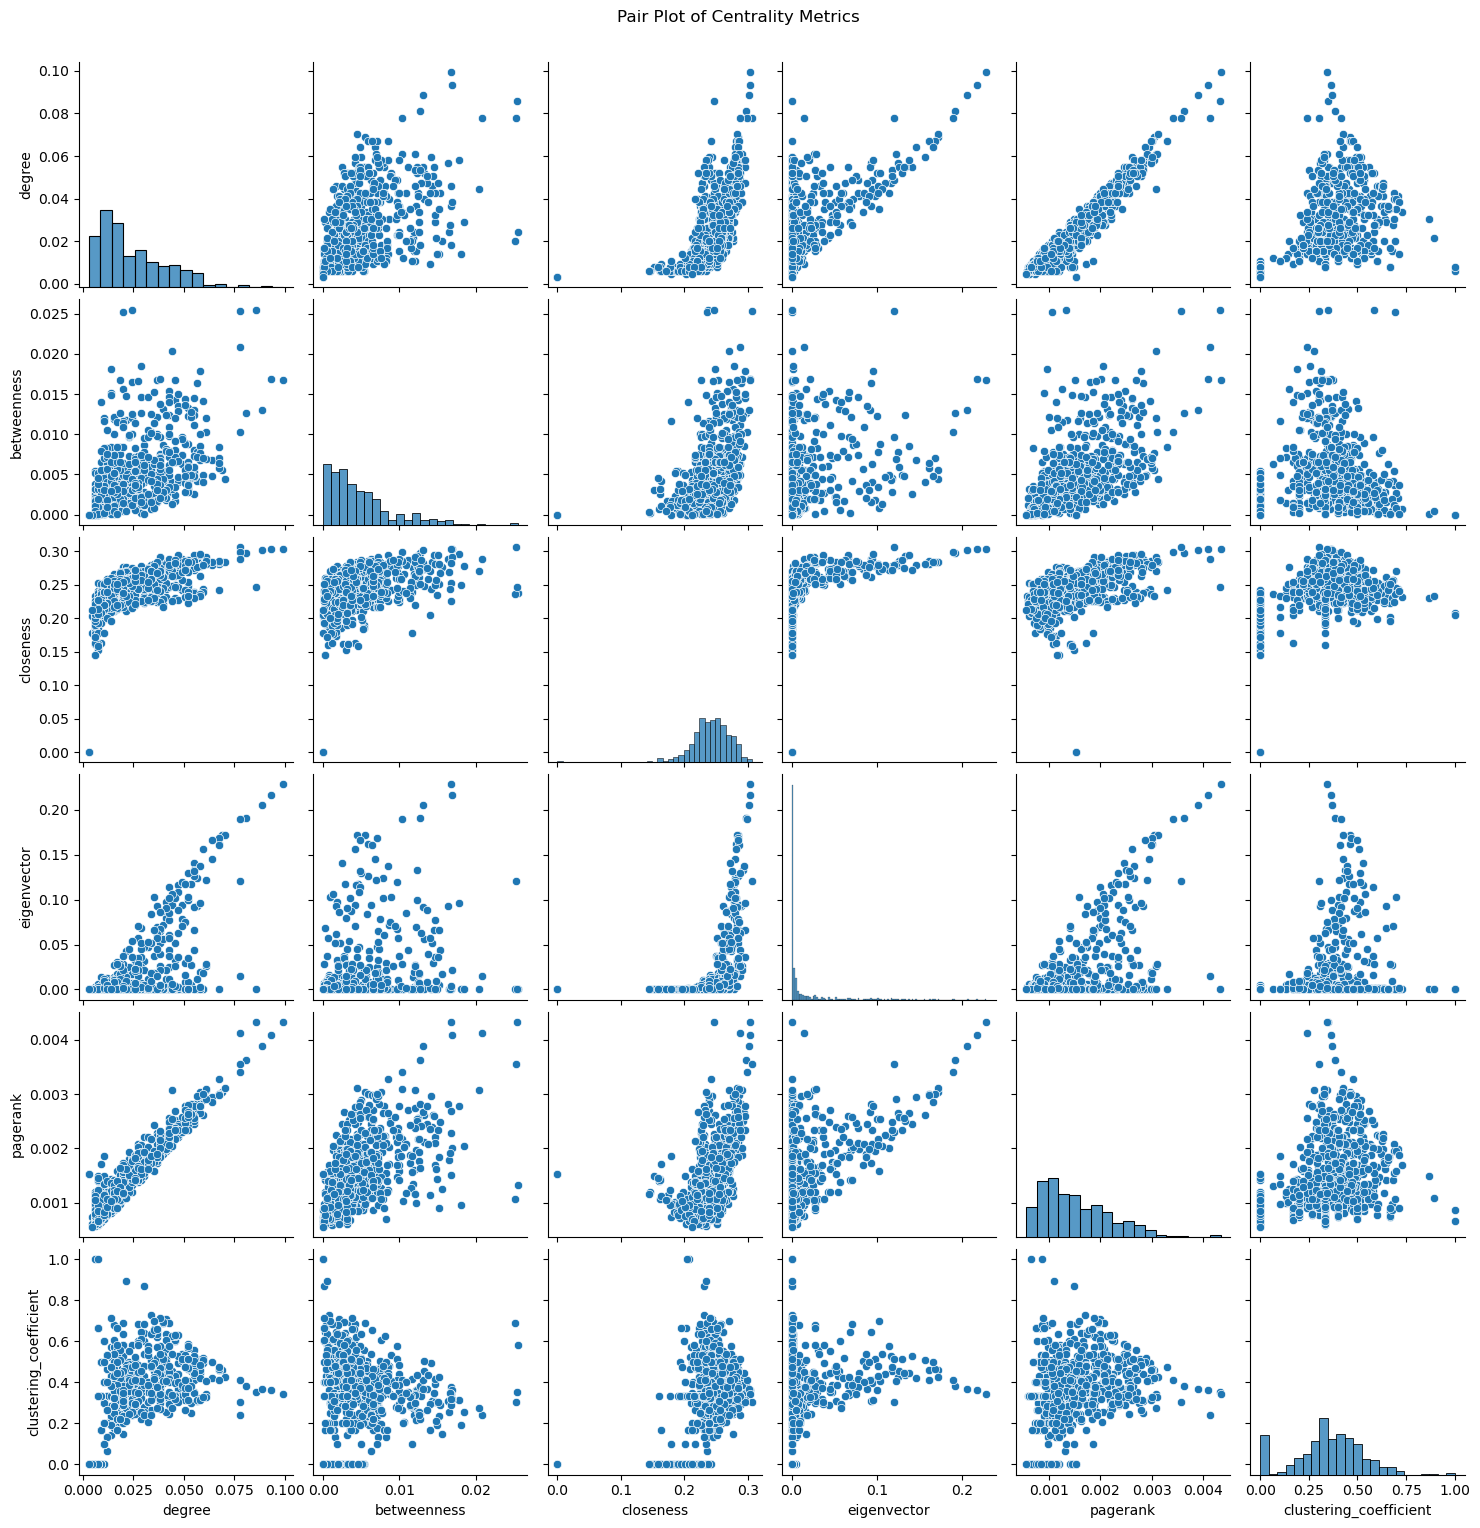

In [26]:
sns.pairplot(metrics_df)
plt.suptitle('Pair Plot of Centrality Metrics', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming metrics_df is already defined from previous steps with all metrics

# Step 1: Normalize all metrics using Min-Max scaling
scaler = MinMaxScaler()
normalized_metrics = pd.DataFrame(scaler.fit_transform(metrics_df), 
                                  index=metrics_df.index, 
                                  columns=metrics_df.columns)

# Step 2: Heatmap of normalized metrics
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_metrics, cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap of Normalized Node Centrality Metrics')
plt.xlabel('Metrics')
plt.ylabel('Genes')
plt.show()

# Step 3: Histograms for each metric
normalized_metrics.plot(kind='hist', bins=20, alpha=0.5, subplots=True, layout=(2, 3), figsize=(15, 10), sharex=True)
plt.suptitle('Histograms of Normalized Node Centrality Metrics')
plt.show()


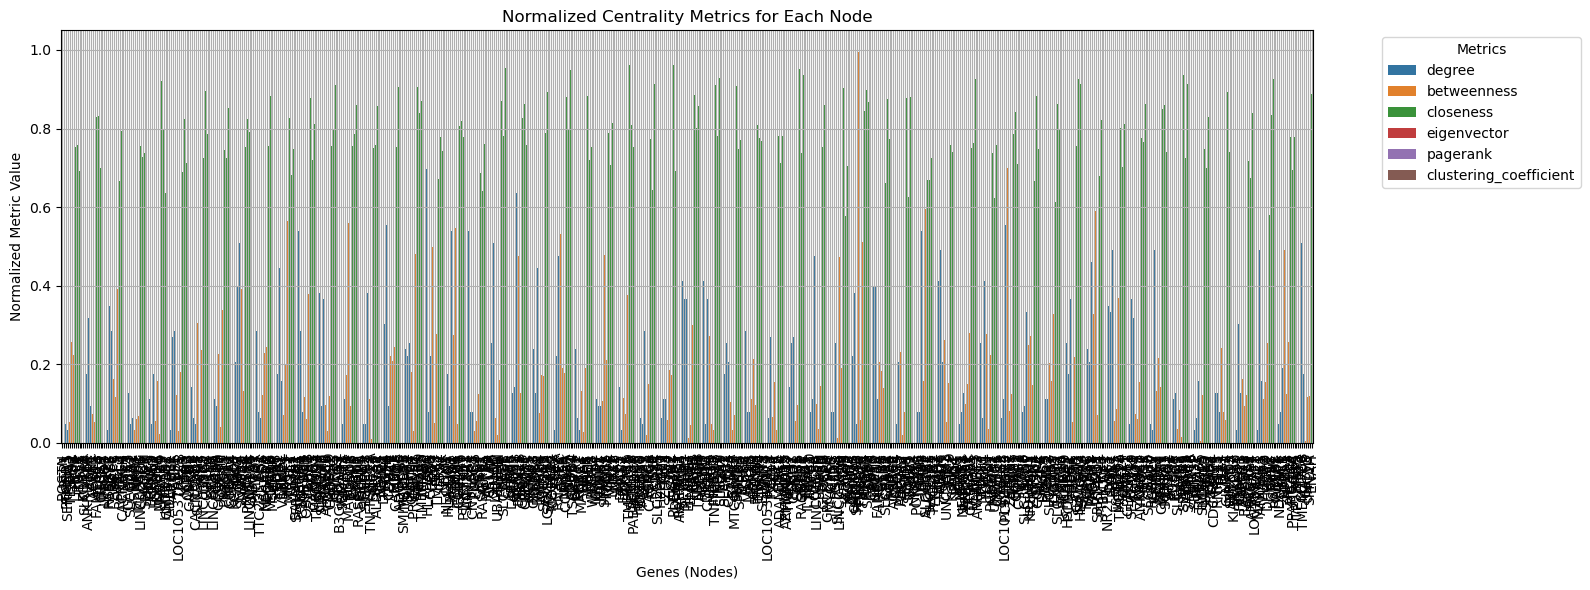

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming metrics_df is already defined from previous steps with all metrics

# Step 1: Normalize all metrics using Min-Max scaling
scaler = MinMaxScaler()
normalized_metrics = pd.DataFrame(scaler.fit_transform(metrics_df), 
                                  index=metrics_df.index, 
                                  columns=metrics_df.columns)

# Step 2: Convert DataFrame to long format for plotting
normalized_metrics_long = normalized_metrics.reset_index().melt(id_vars='index', 
                                                                var_name='Metric', 
                                                                value_name='Value')

# Step 3: Plot the grouped bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=normalized_metrics_long, dodge=True)

# Add labels and rotate x-axis labels for better readability
plt.title('Normalized Centrality Metrics for Each Node')
plt.xlabel('Genes (Nodes)')
plt.ylabel('Normalized Metric Value')
plt.xticks(rotation=90)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# New try for all of it Sep 27

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the adjacency matrix from a CSV file
# Replace 'your_adjacency_matrix.csv' with your file path
adjacency_matrix = pd.read_csv('~/rnaseq_synapse/filtered_adj_matrices/adj_mat_2_1_filt.csv', index_col=0)
G = nx.from_pandas_adjacency(adjacency_matrix)

adjacency_matrix

,CARTPT,SLC27A6,LINC00898,GPR26,HSPB3,CBLN4,LOC105369302,PART1,BMP3,CCK,...,RABEP1,APH1B,WWOX,MLH3,ZNF423,PICALM,FERMT2,PPARGC1A,RORA,WDR12
CARTPT,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
SLC27A6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
LINC00898,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GPR26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HSPB3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PICALM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
FERMT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
PPARGC1A,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
RORA,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming you already have the graph G created from the adjacency matrix

# Step 1: Calculate all metrics
# 1.1 Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 1.2 Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 1.3 Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 1.4 Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# 1.5 PageRank
pagerank = nx.pagerank(G)

# 1.6 Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# 1.7 Node Connectivity (using node_connectivity function)
# The connectivity metric requires NetworkX version 2.5 or later
# node_connectivity = {node: nx.node_connectivity(G, node) for node in G.nodes()}

# Step 2: Combine all metrics into a DataFrame
metrics_df = pd.DataFrame({
    'degree': degree_centrality,
    'betweenness': betweenness_centrality,
    'closeness': closeness_centrality,
    'eigenvector': eigenvector_centrality,
    'pagerank': pagerank,
    'clustering_coefficient': clustering_coefficient
})

# Step 3: Normalize all metrics for comparison
scaler = MinMaxScaler()
normalized_metrics = pd.DataFrame(scaler.fit_transform(metrics_df), 
                                  index=metrics_df.index, 
                                  columns=metrics_df.columns)


# Step 4: Visualization (Optional, based on your preference)
# ... (use the previous visualization code snippets)


In [17]:
normalized_metrics

,degree,betweenness,closeness,eigenvector,pagerank,clustering_coefficient
CARTPT,0.230769,0.294386,0.571911,1.067271e-02,0.327201,0.450000
SLC27A6,0.153846,0.118245,0.466287,1.044782e-02,0.215429,0.500000
LINC00898,0.000000,0.033773,0.086683,9.066574e-07,0.162382,0.000000
GPR26,0.153846,0.285435,0.551151,1.280458e-03,0.168523,0.500000
HSPB3,0.230769,0.208644,0.227960,5.822517e-06,0.414731,0.300000
...,...,...,...,...,...,...
PICALM,0.230769,0.130730,0.720936,8.762586e-02,0.193908,0.300000
FERMT2,0.153846,0.095897,0.654068,1.806631e-02,0.129959,0.500000
PPARGC1A,0.846154,0.930872,0.715009,6.042448e-02,0.918407,0.480769
RORA,0.384615,0.410176,0.595343,1.510081e-02,0.523223,0.428571


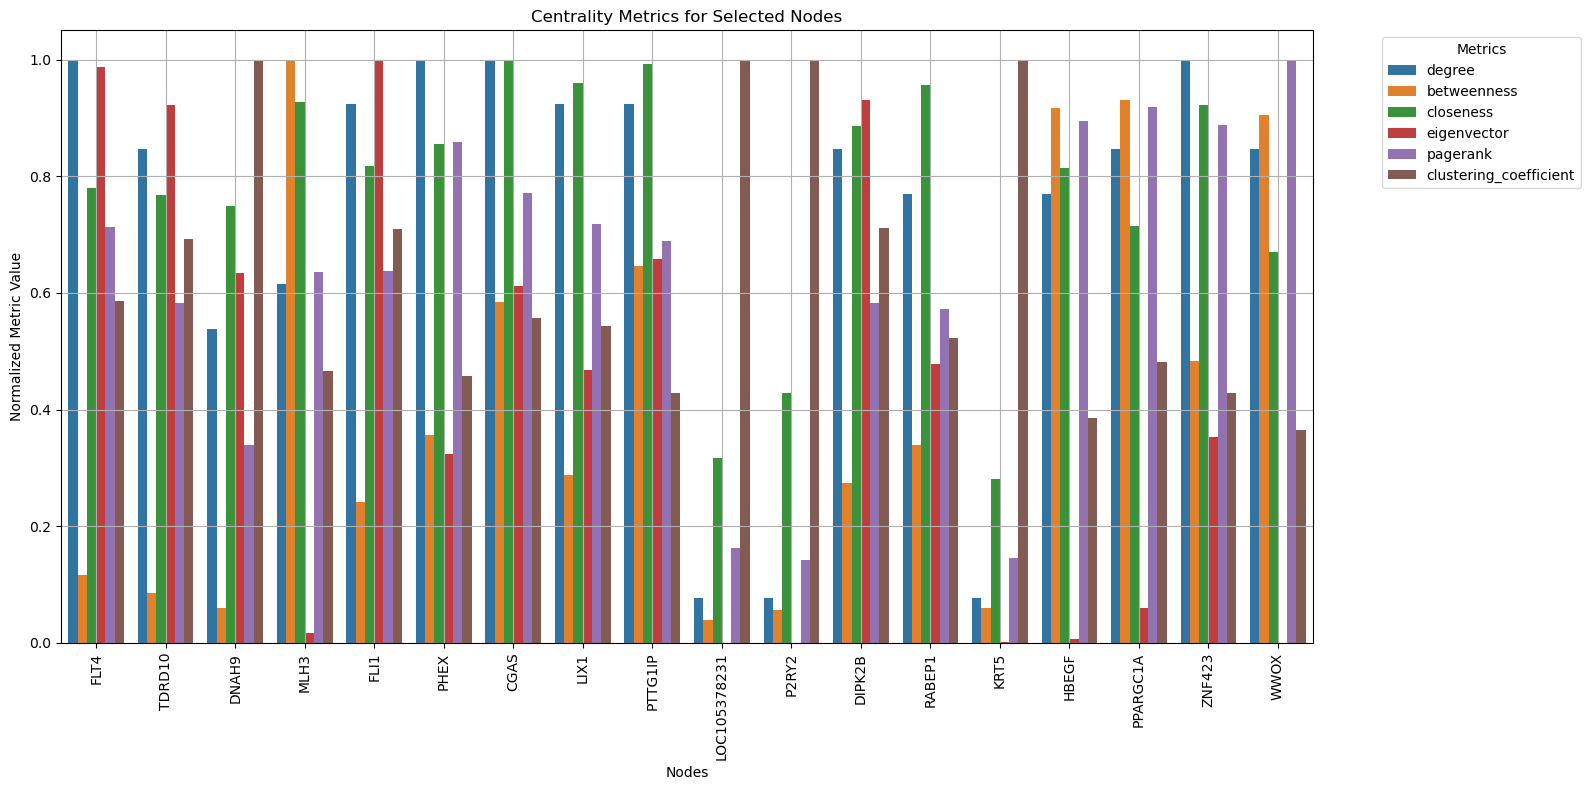

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'normalized_metrics' DataFrame is already defined

# Step 1: Get the top 20 nodes for each metric
top_nodes_per_metric = set()
for col in normalized_metrics.columns:
    top_nodes = normalized_metrics.nlargest(4, col).index
    top_nodes_per_metric.update(top_nodes)

# Convert set to list for indexing
top_nodes_per_metric = list(top_nodes_per_metric)

# Step 2: Filter normalized metrics DataFrame to include only the top nodes
filtered_metrics = normalized_metrics.loc[top_nodes_per_metric]

# Step 3: Convert to long format for seaborn
filtered_metrics_long = filtered_metrics.reset_index().melt(id_vars='index', 
                                                            var_name='Metric', 
                                                            value_name='Value')

# Rename 'index' column to 'Node' for clarity
filtered_metrics_long.rename(columns={'index': 'Node'}, inplace=True)

# Step 4: Plot grouped bar plot for top nodes
plt.figure(figsize=(16, 8))
sns.barplot(x='Node', y='Value', hue='Metric', data=filtered_metrics_long, dodge=True)
plt.title('Centrality Metrics for Selected Nodes')
plt.xlabel('Nodes')
plt.ylabel('Normalized Metric Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/vmottaqi/rnaseq_synapse/filtered_adj_matrices/centrality_metrics_2_1.png", dpi=900)
plt.show()
